In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## -load mnist data and see an example of it.

In [19]:
#loading mnist data
mnist = tf.keras.datasets.mnist 
#seperate data into traning and testing
# the x_train data is the "features." In this case, the features are the images of digits 0-9.
#The y_train is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9?)
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [20]:
#to see an example of our data
print(x_train[0]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## -Visualizing the first element of our data


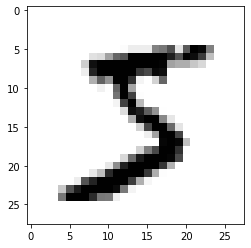

5


In [21]:
#pixcels 28*28 of first data pic
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(y_train[0])

## -Normalize data





In [22]:
#normalizing our data to range from 0 to 1 instead of 0 to 255 
#to simplize the task to the nural network
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

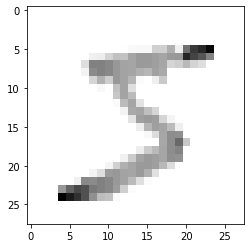

In [23]:
#have a look again
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

## -Model Building and Validation
<li>Initialize a sequential model</li>
<li>define a sequential model</li>
<li>add 2 convolutional layers</li>
<li>no of filters: 32</li>
<li>kernel size: 3x3</li>
<li>activation: "relu"</li>
<li>input shape: (28, 28, 1) for first layer</li>
<li>flatten the data</li>
<li>add Flatten later</li>
<li>flatten layers flatten 2D arrays to 1D array before building the fully connected layers</li>
<li>add 2 dense layers</li>
<li>number of neurons in first layer: 128</li>
<li>number of neurons in last layer: number of classes</li>
<li>activation function in first layer: relu</li>
<li>activation function in last layer: softmax</li>
<li>we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have</li>
<li>neurons equal to the number of output classes</li>

In [24]:
#let's build our model! we will use a Sequential model
#It just means things are going to go in direct order.
#A feed forward model. No going backwards...for now
model = tf.keras.models.Sequential()


In [25]:
#now we have to flatten the pic from 28*28 to 1*784 to be able to feed this features (pixcels) to the input layer of our neural network
model.add(tf.keras.layers.Flatten())


### -Creat Nurel Network

In [26]:
#creating a hidden layer of 128 node with activation function relu
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
#adding another layer to our NN of 128 node and relu AF
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#adding the output layer consist of 10 nodes represent the 10 digits with softmax AF
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#now our model is DONE 

In [27]:
#This is where we pass the settings for actually optimizing/training the model we've defined
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### -Fit the model



In [28]:
#Now, we fit
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4657 - accuracy: 0.8712
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1142 - accuracy: 0.9651
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0715 - accuracy: 0.9770


### -Evaluate our model

In [29]:
#lets evaluate our model 
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)
#It's going to be very likely your accuracy out of sample is a bit worse,
#same with loss.In fact, it should be a red flag if it's identical, or better.

313/313 [==============================] - 1s 1ms/step - loss: 0.0947 - accuracy: 0.9695
0.09473021328449249
0.9695000052452087


In [30]:
predictions=model.predict(x_test)
print (predictions[0])

[2.4295808e-11 5.8888996e-09 2.6188354e-06 8.3262939e-06 4.6868434e-13
 4.3036064e-09 2.0919850e-16 9.9998903e-01 6.8740871e-09 9.4599413e-09]


In [31]:
# numpy argmax function return the index of the max value of the array
#in our case the indix represent the predictied number
print(np.argmax(predictions[0]))

7


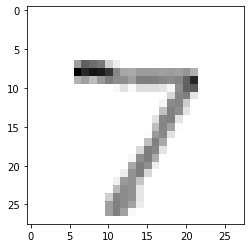

In [32]:
#lets plot it up
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

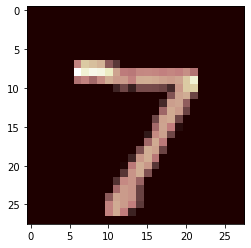

Model prediction: 7


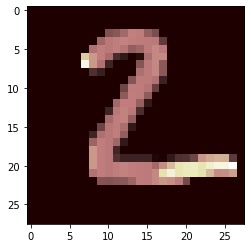

Model prediction: 2


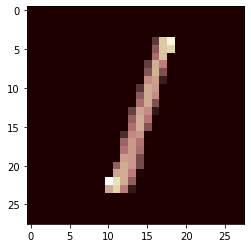

Model prediction: 1


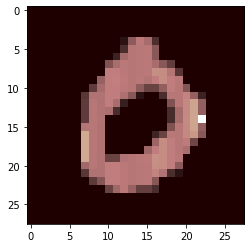

Model prediction: 0


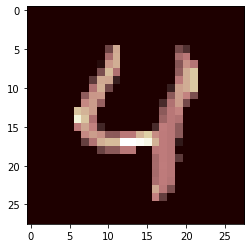

Model prediction: 4


In [33]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = model.predict(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='pink')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions[i]))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
